# External Static B and ESR spectra

The electron-spin resonance spectrum in the context of ODMR contrasts is
modeled for a single $\text{NV}^-$ center and four NV centers along each orientation in a 
homogenous static magnetic field. 


In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import qutip

In [13]:
import nvmodels
import numpy as np

In [14]:
import matplotlib.pyplot as plt

In [15]:
# matplotlib widget requires jupyter-lab and ipympl
# turns matplotlib figures interactive and zoomable

In [16]:
# %matplotlib widget

In [20]:
nvmodels.__version__

'0.0.1.dev1'

In [94]:
nvgs = nvmodels.NVNegativeGroundState()

In [95]:
nves = nvmodels.NVNegativeExcitedState()

In [144]:
polar = 0
azimuthal = 0
_x = np.sin(polar)*np.cos(azimuthal)
_y = np.sin(polar)*np.sin(azimuthal)
_z = np.cos(polar)
B_mag = 0e-4  # 10 Gauss in the z direction
static_B_field = B_mag*np.array([_x, _y, _z])
print(static_B_field)

h_gs = nvgs.zero_field_hamiltonian()
h_gs += nvgs.nitrogen_hyperfine_hamiltonian()
h_gs += nvgs.nitrogen_electric_quadrupole_hamiltonian()
h_gs += nvgs.static_mag_field_hamiltonian(static_B_field, include_nucleus = True)

[0. 0. 0.]


In [145]:
h_gs

Quantum object: dims = [[3, 3], [3, 3]], shape = (9, 9), type = oper, isherm = True
Qobj data =
[[ 9.52856667e+08  0.00000000e+00  0.00000000e+00  0.00000000e+00
   0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
   0.00000000e+00]
 [ 0.00000000e+00  9.60006667e+08  0.00000000e+00 -2.70000000e+06
   0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
   0.00000000e+00]
 [ 0.00000000e+00  0.00000000e+00  9.57136667e+08  0.00000000e+00
  -2.70000000e+06  0.00000000e+00  0.00000000e+00  0.00000000e+00
   0.00000000e+00]
 [ 0.00000000e+00 -2.70000000e+06  0.00000000e+00 -1.91500333e+09
   0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
   0.00000000e+00]
 [ 0.00000000e+00  0.00000000e+00 -2.70000000e+06  0.00000000e+00
  -1.90999333e+09  0.00000000e+00 -2.70000000e+06  0.00000000e+00
   0.00000000e+00]
 [ 0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
   0.00000000e+00 -1.91500333e+09  0.00000000e+00 -2.70000000e+06
   0.00000000e+00

In [148]:
hh = np.zeros((20,20), dtype=np.cdouble)
gs_idx = [0, h_gs.shape[0] , 0, h_gs.shape[1]]
hh[gs_idx[0]:gs_idx[1], gs_idx[2]:gs_idx[3]] = h_gs

In [172]:
h_es = nves.zero_field_hamiltonian()
h_es += nves.nitrogen_hyperfine_hamiltonian()
h_es += nves.nitrogen_electric_quadrupole_hamiltonian()
h_es += nves.static_mag_field_hamiltonian(static_B_field, include_nucleus = True)

In [180]:
h_es

Quantum object: dims = [[3, 3], [3, 3]], shape = (9, 9), type = oper, isherm = True
Qobj data =
[[ 6.42856667e+08  0.00000000e+00  0.00000000e+00  0.00000000e+00
   0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
   0.00000000e+00]
 [ 0.00000000e+00  6.50006667e+08  0.00000000e+00 -2.70000000e+06
   0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
   0.00000000e+00]
 [ 0.00000000e+00  0.00000000e+00  6.47136667e+08  0.00000000e+00
  -2.70000000e+06  0.00000000e+00  0.00000000e+00  0.00000000e+00
   0.00000000e+00]
 [ 0.00000000e+00 -2.70000000e+06  0.00000000e+00 -1.29500333e+09
   0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
   0.00000000e+00]
 [ 0.00000000e+00  0.00000000e+00 -2.70000000e+06  0.00000000e+00
  -1.28999333e+09  0.00000000e+00 -2.70000000e+06  0.00000000e+00
   0.00000000e+00]
 [ 0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
   0.00000000e+00 -1.29500333e+09  0.00000000e+00 -2.70000000e+06
   0.00000000e+00

In [181]:
470e12*qutip.qeye(h_es.shape[0])

Quantum object: dims = [[9], [9]], shape = (9, 9), type = oper, isherm = True
Qobj data =
[[4.7e+14 0.0e+00 0.0e+00 0.0e+00 0.0e+00 0.0e+00 0.0e+00 0.0e+00 0.0e+00]
 [0.0e+00 4.7e+14 0.0e+00 0.0e+00 0.0e+00 0.0e+00 0.0e+00 0.0e+00 0.0e+00]
 [0.0e+00 0.0e+00 4.7e+14 0.0e+00 0.0e+00 0.0e+00 0.0e+00 0.0e+00 0.0e+00]
 [0.0e+00 0.0e+00 0.0e+00 4.7e+14 0.0e+00 0.0e+00 0.0e+00 0.0e+00 0.0e+00]
 [0.0e+00 0.0e+00 0.0e+00 0.0e+00 4.7e+14 0.0e+00 0.0e+00 0.0e+00 0.0e+00]
 [0.0e+00 0.0e+00 0.0e+00 0.0e+00 0.0e+00 4.7e+14 0.0e+00 0.0e+00 0.0e+00]
 [0.0e+00 0.0e+00 0.0e+00 0.0e+00 0.0e+00 0.0e+00 4.7e+14 0.0e+00 0.0e+00]
 [0.0e+00 0.0e+00 0.0e+00 0.0e+00 0.0e+00 0.0e+00 0.0e+00 4.7e+14 0.0e+00]
 [0.0e+00 0.0e+00 0.0e+00 0.0e+00 0.0e+00 0.0e+00 0.0e+00 0.0e+00 4.7e+14]]

In [183]:
h_es.dims

[[3, 3], [3, 3]]

In [182]:
h_es + 470e12*qutip.qeye(h_es.shape[0])

TypeError: Incompatible quantum object dimensions

In [151]:
es_idx = [gs_idx[1], gs_idx[1] + h_es.shape[0] , gs_idx[3], gs_idx[3] + h_es.shape[1]]

In [152]:
hh[es_idx[0]:es_idx[1], es_idx[2]:es_idx[3]] = h_es

In [153]:
ss_idx = [es_idx[1], es_idx[1] + 2 , es_idx[3], es_idx[3] + 2]

In [154]:
hh[ss_idx[0]:ss_idx[1], ss_idx[2]:ss_idx[3]]  = np.eye(2)

In [155]:
qutip.Qobj(hh)

Quantum object: dims = [[20], [20]], shape = (20, 20), type = oper, isherm = True
Qobj data =
[[ 9.52856667e+08  0.00000000e+00  0.00000000e+00  0.00000000e+00
   0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
   0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
   0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
   0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00]
 [ 0.00000000e+00  9.60006667e+08  0.00000000e+00 -2.70000000e+06
   0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
   0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
   0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
   0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00]
 [ 0.00000000e+00  0.00000000e+00  9.57136667e+08  0.00000000e+00
  -2.70000000e+06  0.00000000e+00  0.00000000e+00  0.00000000e+00
   0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
   0.00000000e+00  0.00000000e+00  0.00000000e

In [156]:
qutip.Qobj(hh[es_idx[0]:es_idx[1], es_idx[2]:es_idx[3]])

Quantum object: dims = [[9], [9]], shape = (9, 9), type = oper, isherm = True
Qobj data =
[[ 6.42856667e+08  0.00000000e+00  0.00000000e+00  0.00000000e+00
   0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
   0.00000000e+00]
 [ 0.00000000e+00  6.50006667e+08  0.00000000e+00 -2.70000000e+06
   0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
   0.00000000e+00]
 [ 0.00000000e+00  0.00000000e+00  6.47136667e+08  0.00000000e+00
  -2.70000000e+06  0.00000000e+00  0.00000000e+00  0.00000000e+00
   0.00000000e+00]
 [ 0.00000000e+00 -2.70000000e+06  0.00000000e+00 -1.29500333e+09
   0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
   0.00000000e+00]
 [ 0.00000000e+00  0.00000000e+00 -2.70000000e+06  0.00000000e+00
  -1.28999333e+09  0.00000000e+00 -2.70000000e+06  0.00000000e+00
   0.00000000e+00]
 [ 0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
   0.00000000e+00 -1.29500333e+09  0.00000000e+00 -2.70000000e+06
   0.00000000e+00]
 [ 0

In [157]:
qutip.Qobj(hh[gs_idx[0]:gs_idx[1], gs_idx[2]:gs_idx[3]])

Quantum object: dims = [[9], [9]], shape = (9, 9), type = oper, isherm = True
Qobj data =
[[ 9.52856667e+08  0.00000000e+00  0.00000000e+00  0.00000000e+00
   0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
   0.00000000e+00]
 [ 0.00000000e+00  9.60006667e+08  0.00000000e+00 -2.70000000e+06
   0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
   0.00000000e+00]
 [ 0.00000000e+00  0.00000000e+00  9.57136667e+08  0.00000000e+00
  -2.70000000e+06  0.00000000e+00  0.00000000e+00  0.00000000e+00
   0.00000000e+00]
 [ 0.00000000e+00 -2.70000000e+06  0.00000000e+00 -1.91500333e+09
   0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
   0.00000000e+00]
 [ 0.00000000e+00  0.00000000e+00 -2.70000000e+06  0.00000000e+00
  -1.90999333e+09  0.00000000e+00 -2.70000000e+06  0.00000000e+00
   0.00000000e+00]
 [ 0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
   0.00000000e+00 -1.91500333e+09  0.00000000e+00 -2.70000000e+06
   0.00000000e+00]
 [ 0

In [158]:
qutip.Qobj(hh[ss_idx[0]:ss_idx[1], ss_idx[2]:ss_idx[3]])

Quantum object: dims = [[2], [2]], shape = (2, 2), type = oper, isherm = True
Qobj data =
[[1. 0.]
 [0. 1.]]

In [159]:
hh_full = qutip.Qobj(hh)

In [160]:
eigenvalues, eigenstates = hh_full.eigenstates()


In [161]:
eigenstates[0]

Quantum object: dims = [[20], [1]], shape = (20, 1), type = ket
Qobj data =
[[0.00000000e+00]
 [9.39125926e-04]
 [0.00000000e+00]
 [9.99999559e-01]
 [0.00000000e+00]
 [0.00000000e+00]
 [0.00000000e+00]
 [0.00000000e+00]
 [0.00000000e+00]
 [0.00000000e+00]
 [0.00000000e+00]
 [0.00000000e+00]
 [0.00000000e+00]
 [0.00000000e+00]
 [0.00000000e+00]
 [0.00000000e+00]
 [0.00000000e+00]
 [0.00000000e+00]
 [0.00000000e+00]
 [0.00000000e+00]]

Text(0.5, 0, 'State index')

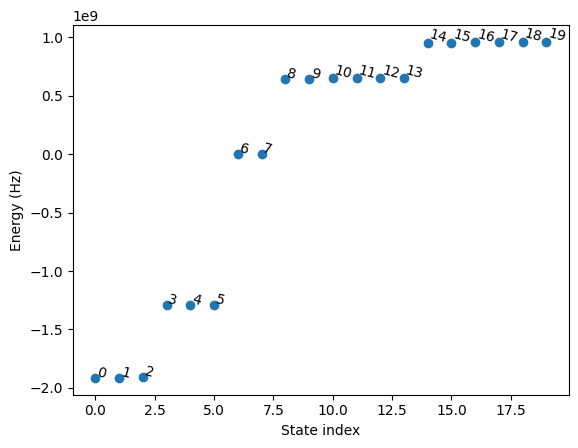

In [162]:
state_probs_text = [f'{i}' for i,s in enumerate(eigenstates)]

fig, ax = nvmodels.plotting.plot_eigenspectrum_mpl(eigenvalues, state_probs_text)
ax.set_ylabel('Energy (Hz)')
ax.set_xlabel('State index')

In [164]:
(eigenvalues[3] - eigenvalues[0])*1e-9 # in GHz

0.6199987875956321

In [166]:
wavelength = 3e8/(eigenvalues[3] - eigenvalues[0])

In [184]:
(eigenvalues[14] - eigenvalues[0])*1e-9 # in GHz

2.867862535641119

In [168]:
#what is the frequency of light that excites from 3A2 to 3E?
c = 3e8
wavelength = 637e-9
freq = c / wavelength

In [171]:
freq*1e-12 #470 THz

470.95761381475666

In [185]:
# do it again, but add a B field
polar = 0
azimuthal = 0
_x = np.sin(polar)*np.cos(azimuthal)
_y = np.sin(polar)*np.sin(azimuthal)
_z = np.cos(polar)
B_mag = 50e-4  # 10 Gauss in the z direction
static_B_field = B_mag*np.array([_x, _y, _z])
print(static_B_field)

h_gs = nvgs.zero_field_hamiltonian()
h_gs += nvgs.nitrogen_hyperfine_hamiltonian()
h_gs += nvgs.nitrogen_electric_quadrupole_hamiltonian()
h_gs += nvgs.static_mag_field_hamiltonian(static_B_field, include_nucleus = True)

h_es = nves.zero_field_hamiltonian()
h_es += nves.nitrogen_hyperfine_hamiltonian()
h_es += nves.nitrogen_electric_quadrupole_hamiltonian()
h_es += nves.static_mag_field_hamiltonian(static_B_field, include_nucleus = True)

#combine into single hamiltonian
ISC_size = 3  #note, we are neglecting 1E state which has a lifetime of 1 ns. the 1A1 lifetime is 300 ns. 
  # there are three states here, corresponding to the three nuclear spin states
fullh_size = 18 + ISC_size 

hh = np.zeros((20,20), dtype=np.cdouble)
gs_idx = [0, h_gs.shape[0] , 0, h_gs.shape[1]]
hh[gs_idx[0]:gs_idx[1], gs_idx[2]:gs_idx[3]] = h_gs

es_idx = [gs_idx[1], gs_idx[1] + h_es.shape[0] , gs_idx[3], gs_idx[3] + h_es.shape[1]]
hh[es_idx[0]:es_idx[1], es_idx[2]:es_idx[3]] = h_es

ss_idx = [es_idx[1], es_idx[1] + ISC_size , es_idx[3], es_idx[3] + ISC_size]
hh[ss_idx[0]:ss_idx[1], ss_idx[2]:ss_idx[3]]  = np.eye(ISC_size)

[0.    0.    0.005]


ValueError: could not broadcast input array from shape (3,3) into shape (2,2)

In [ ]:
gamma_03 = gamma_14 = gamma_25 = 64e6 #

In [ ]:
gamma_30 = gamma_41 = gamma_52 = 64e6 #

In [115]:
gamma_46 = gamma_56 = 79.8e6 

In [ ]:
gamma_36 = 11.8e6
gamma_60 = 5.6e6

In [ ]:
epsilon = 0.01 #ratio of spin non-conserving transition / spontaneous emission

In [13]:
rf_freq = np.arange(2.0e9, 3.5e9, 1e6)

In [14]:
energy_transitions = nv.electron_spin_resonances(h)
contrast = 1 + np.array([nvmodels.utilities.lorentzian(rf_freq, e, -0.01, 10e6) for e in energy_transitions]).sum(axis=0)

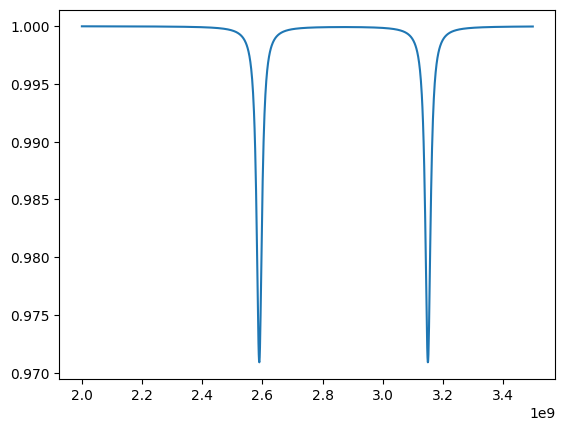

In [15]:
fix,ax = plt.subplots()

plt.plot(rf_freq, contrast)

In [16]:
# hyperfine splitting

rf_freq = np.arange(2.586e9, 2.594e9, .05e6)
contrast = 1 + np.array([nvmodels.utilities.lorentzian(rf_freq, e, -.1, .1e6) for e in energy_transitions]).sum(axis=0)

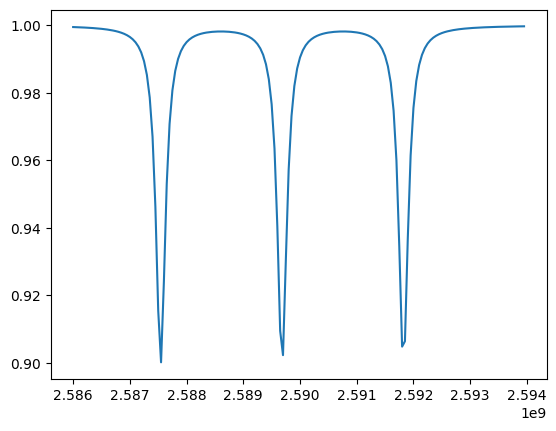

In [17]:
fix,ax = plt.subplots()
plt.plot(rf_freq, contrast)

## All 4 orientations

For ensembles of NV centers, we will have NV centers oriented in four different ways, according to the crystal structure of diamond. 
We want to add the other three NV center orientations but use the same B field that is was applied to our NV center above.
We need to find the rotation to the other three NV center axis

In [18]:
z = np.array([0,0,1])
nv111 = np.array([1,1,1])/np.linalg.norm(np.array([1,1,1]))
nv1b1b1 = np.array([1,-1,-1])/np.linalg.norm(np.array([1,-1,-1]))
nvb11b1 = np.array([-1, 1, -1])/np.linalg.norm(np.array([-1,1,-1]))
nvb1b11 = np.array([-1, -1, 1])/np.linalg.norm(np.array([-1,-1,1]))

nv_orientations = [nv111, nv1b1b1, nvb11b1, nvb1b11]

In [19]:
B_nv111_axis_in_lab_frame = 100e-4*np.array([1,1,1])/np.linalg.norm(np.array([1,1,1]))

In [20]:
# Demonstrate our rotation matrices
nvmodels.utilities.rotation_matrix_from_vectors(nv111,z)

array([[ 0.78867513, -0.21132487, -0.57735027],
       [-0.21132487,  0.78867513, -0.57735027],
       [ 0.57735027,  0.57735027,  0.57735027]])

In [21]:
nvmodels.utilities.lab_to_nv_orientation(z, nv111)# a z-vector in the lab frame represened in the nv111 frame

array([-0.57735027, -0.57735027,  0.57735027])

In [22]:
nvmodels.utilities.lab_to_nv_orientation(nv111, nv111)

array([-5.55111512e-17, -5.55111512e-17,  1.00000000e+00])

In [23]:
nvmodels.utilities.lab_to_nv_orientation(B_nv111_axis_in_lab_frame, nv111) # rotate to nv111 axis -- B should be entirely along Z

array([-4.33680869e-19, -4.33680869e-19,  1.00000000e-02])

In [24]:
nvmodels.utilities.lab_to_nv_orientation(B_nv111_axis_in_lab_frame, nvb1b11) #  rotate to nvb1b11 axis

array([ 0.00666667,  0.00666667, -0.00333333])

### B field aligned along 111

Using the B field aligned along 111, what should our ODMR spectrum look like?

In [25]:
energy_transitions = []
contrasts = []
rf_freq = np.arange(2.0e9, 3.5e9, 1e6)
lorentz_width = 10e6
contrast_amp = -0.01

for nv_orient in nv_orientations:
    h = nv.zero_field_hamiltonian()
    h += nv.nitrogen_hyperfine_hamiltonian()
    h += nv.nitrogen_electric_quadrupole_hamiltonian()

    B = nvmodels.utilities.lab_to_nv_orientation(B_nv111_axis_in_lab_frame, nv_orient)

    h += nv.static_mag_field_hamiltonian(B, include_nucleus = True)
    energy_transitions += nv.electron_spin_resonances(h)
    contrasts.append(np.array([nvmodels.utilities.lorentzian(rf_freq, e, contrast_amp, lorentz_width) for e in energy_transitions]).sum(axis=0))
    
full_spectrum = 1 + np.array(contrasts).sum(axis=0)

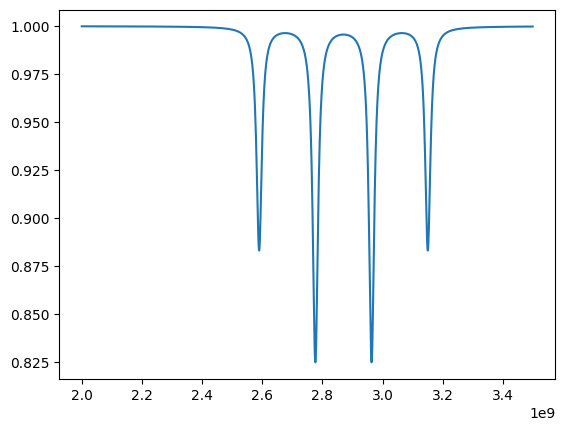

In [26]:
fix,ax = plt.subplots()
plt.plot(rf_freq, full_spectrum)

### Arbitrary B field direction.

Through trial and error, found a B field that ensures we see all splittings

In [27]:
energy_transitions = []
contrasts = []
# high res
rf_freq = np.arange(2.6e9, 3.15e9, .025e6)
lorentz_width = .5e6
contrast_amp = -0.01

# low res
# rf_freq = np.arange(2.0e9, 3.5e9, 1e6)
# lorentz_width = 10e6
# contrast_amp = -0.01

v = np.array([.2,-.5,1]) #choose the direction of the B field

B_in_lab_frame = 100e-4*v/np.linalg.norm(v)

for nv_orient in nv_orientations:
    h = nv.zero_field_hamiltonian()
    h += nv.nitrogen_hyperfine_hamiltonian()
    h += nv.nitrogen_electric_quadrupole_hamiltonian()

    B = nvmodels.utilities.lab_to_nv_orientation(B_in_lab_frame, nv_orient)

    h += nv.static_mag_field_hamiltonian(B, include_nucleus = True)
    energy_transitions += nv.electron_spin_resonances(h)
    contrasts.append(np.array([nvmodels.utilities.lorentzian(rf_freq, e, contrast_amp, lorentz_width) for e in energy_transitions]).sum(axis=0))
    
full_spectrum = 1 + np.array(contrasts).sum(axis=0)

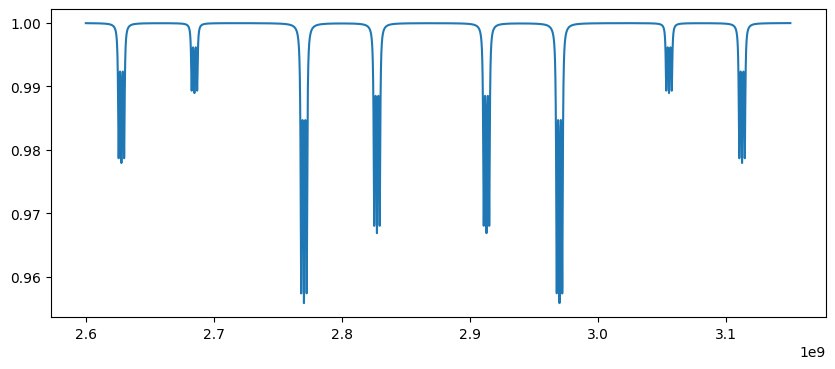

In [28]:
fix,ax = plt.subplots(figsize=(10,4))
plt.plot(rf_freq, full_spectrum)